# 2.1 – Imports

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../src")
from data_utils import load_mnist_data
from models import PretrainedResNetForMNIST, PretrainedMobileNetForMNIST

# 2.2 – Device configuration

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation du device : {device}")


Utilisation du device : cpu


# 2.3 – Chargement des données

In [11]:
labeled_loader, _, _=load_mnist_data(data_dir="../data", labeled_fraction=0.1, batch_size=50)
example_batch=next(iter(labeled_loader))
images, labels=example_batch
print(f"Forme du batch : {images.shape}, Labels : {labels.tolist()}")


Forme du batch : torch.Size([50, 1, 28, 28]), Labels : [5, 5, 8, 0, 5, 0, 2, 2, 1, 0, 4, 6, 4, 3, 8, 2, 0, 6, 4, 6, 9, 2, 3, 9, 1, 3, 5, 4, 7, 4, 9, 1, 4, 7, 1, 7, 7, 7, 3, 2, 7, 4, 2, 4, 5, 4, 3, 0, 4, 8]


2.4 – Chargement des modèles

In [12]:
resnet_model=PretrainedResNetForMNIST().to(device)
mobilnet_model=PretrainedMobileNetForMNIST().to(device)

print(resnet_model)

PretrainedResNetForMNIST(
  (resnet): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine

# 2.5 – Sanity check de prédiction (ResNet18)

In [13]:
resnet_model.eval()
with torch.no_grad():
    images_gpu = images.to(device)
    outputs = resnet_model(images_gpu)
    _, preds = torch.max(outputs, 1)
print(f"Prédictions ResNet18 : {preds.tolist()}")

Prédictions ResNet18 : [2, 3, 5, 2, 5, 3, 2, 2, 5, 5, 5, 2, 5, 3, 2, 3, 2, 2, 2, 2, 5, 5, 3, 5, 2, 5, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 2, 3, 3, 5, 2, 5, 3, 2, 2, 2, 3, 2, 2, 2]


2.6 – Sanity check de prédiction (MobileNetV2)

In [15]:
mobilnet_model.eval()
with torch.no_grad():
    outputs2 = mobilnet_model(images_gpu)
    _, preds2 = torch.max(outputs2, 1)
print(f"Prédictions MobileNetV2 : {preds2.tolist()}")

Prédictions MobileNetV2 : [4, 4, 4, 6, 4, 8, 4, 8, 4, 8, 4, 8, 4, 4, 3, 8, 8, 9, 4, 8, 4, 8, 8, 3, 3, 4, 8, 4, 9, 4, 4, 4, 4, 3, 4, 3, 3, 8, 8, 4, 3, 4, 4, 4, 5, 4, 9, 8, 4, 3]


# 2.7 – Visualisation du batch avec prédictions

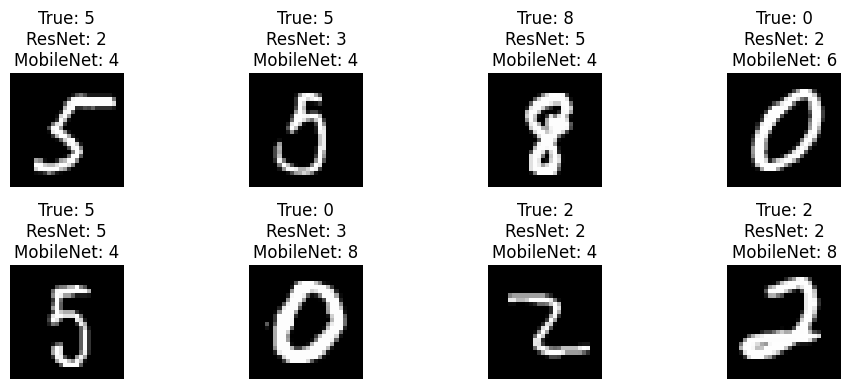

In [20]:
plt.figure(figsize=(10, 4))
for i in range(min(len(images), 8)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"True: {labels[i]}\nResNet: {preds[i]}\nMobileNet: {preds2[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
